# Buidling A model to Predict Income Using Random Forest Classification Algorithm

## 1. Import and read income data

In [36]:
import pandas as pd
df = pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## 2. Explore Data Set

In [37]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [39]:
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [40]:
df.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [ ]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

## 3. Use Hot Encoding to Encode Some Columns in the Dataset and Remove Some Solumns

In [ ]:
df = pd.concat([df.drop('occupation', axis=1), pd.get_dummies(df.occupation).add_prefix('occupation_')], axis=1)
df = pd.concat([df.drop('workclass', axis=1), pd.get_dummies(df.workclass).add_prefix('workkclass_')], axis=1)
df = df.drop('education', axis=1)
df = pd.concat([df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status']).add_prefix('marital-status_')], axis=1)
df = pd.concat([df.drop('relationship', axis=1), pd.get_dummies(df.relationship).add_prefix('relationship_')], axis=1)
df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df.race).add_prefix('race_')], axis=1)
df = pd.concat([df.drop('native-country', axis=1), pd.get_dummies(df['native-country']).add_prefix('native-country_')], axis=1)
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,Male,0,0,50,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,Male,0,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,Male,7688,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,Female,0,0,30,<=50K,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,154374,9,Male,0,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,151910,9,Female,0,0,40,<=50K,False,True,...,False,False,False,False,False,False,False,True,False,False
48840,22,201490,9,Male,0,0,20,<=50K,False,True,...,False,False,False,False,False,False,False,True,False,False


## 4. Use Ordinal Encoding to Encode Gender and Income Columns

In [ ]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [ ]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,1,0,0,50,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,1,0,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,1,7688,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,0,0,0,30,0,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,0,38,0,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,154374,9,1,0,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,151910,9,0,0,0,40,0,False,True,...,False,False,False,False,False,False,False,True,False,False
48840,22,201490,9,1,0,0,20,0,False,True,...,False,False,False,False,False,False,False,True,False,False


## 5. View All Columns in the dataset

In [ ]:
df.columns.values

array(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'workkclass_?', 'workkclass_Federal-gov', 'workkclass_Local-gov',
       'workkclass_Never-worked', 'workkclass_Private',
       'workkclass_Self-emp-inc', 'workkclass_Self-emp-not-inc',
       'workkclass_State-gov', 'workkclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
   

## 6. Create a heatmap of feature correlation values for the dataset

<Axes: >

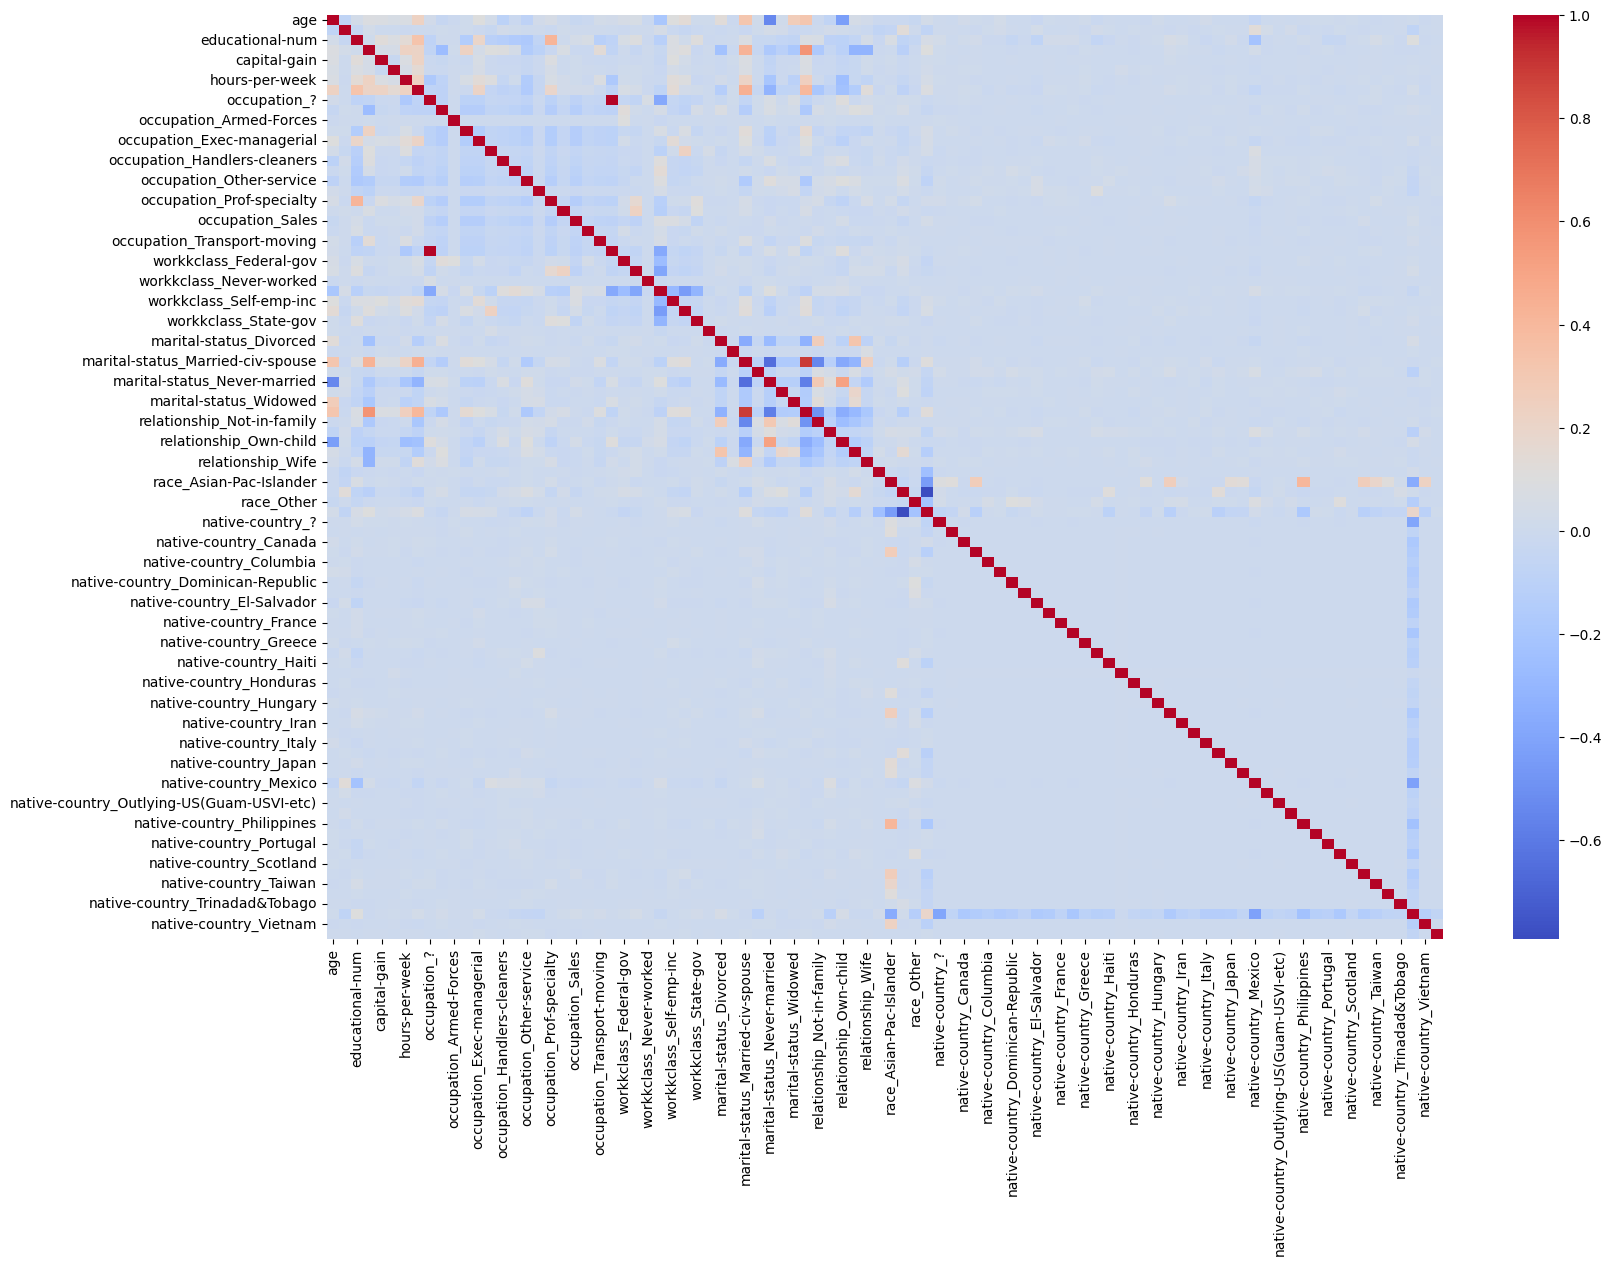

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")

## 7. Drop columns with low correlation and replot the heatmatp for clearer visuals

In [ ]:
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis=1)
df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workkclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,False,False,False,False,False,False,True,False,False,True,False,False
1,38,9,1,0,0,50,0,False,False,False,False,False,True,False,True,False,False,False,False
2,28,12,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
3,44,10,1,7688,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
4,18,10,0,0,0,30,0,False,False,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,False,False,False,False,False,True,False,False,False,False,False,True
48838,40,9,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
48839,58,9,0,0,0,40,0,False,False,False,False,False,False,False,False,False,False,True,False
48840,22,9,1,0,0,20,0,False,False,False,False,False,False,True,False,False,True,False,False


<Axes: >

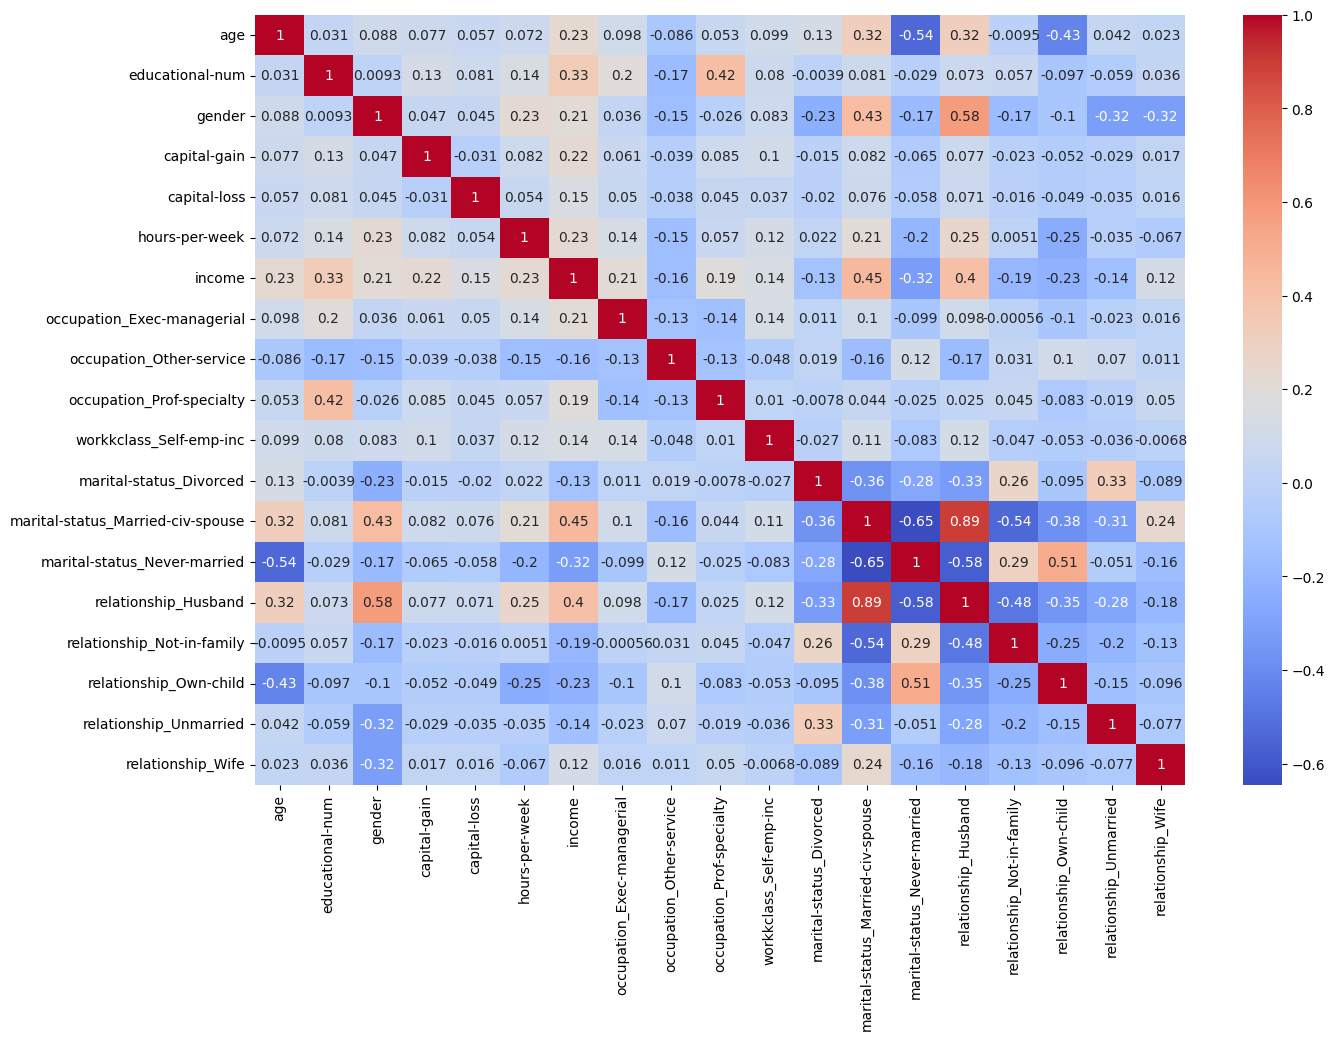

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_dropped.corr(), annot=True, cmap="coolwarm")

## 8. Import RF Classifier and the train test split library, Split data into train and test data using .2 test size split

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = df.drop('fnlwgt', axis=1)

train_df, test_df = train_test_split(df, test_size=0.2)
train_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
9048,34,5,0,0,0,35,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
23410,36,13,1,0,1876,44,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2084,29,13,0,0,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3817,24,5,0,0,0,35,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5803,47,9,1,0,0,55,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42139,37,11,1,0,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
19714,37,9,1,0,0,45,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
27374,55,11,1,0,1977,50,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
31047,35,13,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
test_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
33015,27,5,1,0,0,32,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
22683,20,10,1,0,0,35,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2593,72,9,1,0,0,32,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1241,33,13,0,3103,0,60,1,True,False,False,...,False,False,False,False,False,False,False,True,False,False
44430,43,5,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24841,32,10,1,0,0,30,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
47391,40,10,0,0,0,40,1,False,True,False,...,False,False,False,False,False,False,False,True,False,False
36884,49,13,1,0,0,50,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
39100,32,10,0,0,0,40,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False


## 9. Since income is the respose feature, remove the column from the train and test datasets

In [ ]:
train_X = train_df.drop('income', axis=1)
train_y=Y = train_df['income']

test_X = test_df.drop('income', axis=1)
test_y=Y = test_df['income']

## 10. Create RF model and fit the data

In [ ]:
forest = RandomForestClassifier()
forest.fit(train_X, train_y)

RandomForestClassifier()

## 11. Save RF Model

In [ ]:
import joblib as jb

jb.dump(forest, 'originalModle.pkl')

['originalModle.pkl']

## 12. Determine the accuracy score of the model

In [ ]:
forest.score(test_X, test_y)

0.8489098167673252

## 13. Get feature importances in the model

In [ ]:
forest.feature_importances_

array([2.29408911e-01, 1.26135441e-01, 1.44074342e-02, 1.09844781e-01,
       3.68805266e-02, 1.14713472e-01, 1.97183391e-03, 5.03717464e-03,
       6.09978807e-05, 5.73825347e-03, 2.10904607e-02, 4.52540340e-03,
       2.97020244e-03, 3.97984823e-03, 7.72509068e-03, 1.85652616e-04,
       1.87719227e-02, 2.74673596e-03, 6.12226968e-03, 4.26711697e-03,
       4.29073073e-03, 1.80299714e-03, 5.11396084e-03, 5.32797149e-03,
       2.08374172e-06, 9.22178668e-03, 5.67972950e-03, 8.15201757e-03,
       4.26101604e-03, 1.44944335e-04, 7.09239574e-03, 3.74612026e-04,
       6.66173675e-02, 1.12167324e-03, 2.62950629e-02, 2.01832146e-03,
       1.96790998e-03, 4.79722030e-02, 1.18888859e-02, 1.70781572e-03,
       1.07549265e-02, 6.31351856e-03, 1.03089426e-02, 1.40520632e-03,
       3.16139214e-03, 4.75320978e-03, 1.08739893e-03, 6.15941966e-03,
       2.98814716e-03, 3.30891548e-04, 1.29830646e-03, 5.91369576e-04,
       2.38228371e-04, 7.91691341e-04, 2.32918379e-04, 1.51202088e-04,
      

In [ ]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}
importances #Note fnlwgt - Final Weight (tells us how many people belong to that group)

{'age': 0.22940891142608846,
 'educational-num': 0.12613544100663993,
 'hours-per-week': 0.11471347194729073,
 'capital-gain': 0.10984478128136918,
 'marital-status_Married-civ-spouse': 0.066617367486947,
 'relationship_Husband': 0.047972202958485206,
 'capital-loss': 0.036880526611200726,
 'marital-status_Never-married': 0.026295062943611974,
 'occupation_Exec-managerial': 0.02109046070564591,
 'occupation_Prof-specialty': 0.018771922726099205,
 'gender': 0.014407434199534653,
 'relationship_Not-in-family': 0.011888885862056971,
 'relationship_Own-child': 0.010754926547654694,
 'relationship_Wife': 0.010308942595189156,
 'workkclass_Private': 0.009221786675869459,
 'workkclass_Self-emp-not-inc': 0.00815201757049332,
 'occupation_Other-service': 0.007725090682936929,
 'marital-status_Divorced': 0.007092395743917653,
 'native-country_United-States': 0.0063624934672160335,
 'relationship_Unmarried': 0.006313518563783529,
 'race_White': 0.006159419657418692,
 'occupation_Sales': 0.0061222

## 14. Perform Hyperparameter optimization to tune model

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 250],
    'max_depth': [5, 10, 30, None],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, verbose=10)
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.840 total time=   0.7s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.832 total time=   0.7s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.847 total time=   0.7s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.836 total time=   0.7s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

## 16. Save Tuned Estimator Model

In [ ]:
jb.dump(grid_search, 'TunedModel.pkl')

['TunedModel.pkl']

## 17. Get the best estimator model

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=4,
                       n_estimators=250)

In [ ]:
forest_2 = grid_search.best_estimator_

## 18. Get the score of the best estmator model

In [ ]:
forest_2.score(test_X, test_y)

0.8659023441498618

## 19. Get feature importance in the best estimator model

In [ ]:
importances_2 = dict(zip(forest_2.feature_names_in_, forest_2.feature_importances_))
importances_2 = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}
importances_2

{'age': 0.22940891142608846,
 'educational-num': 0.12613544100663993,
 'hours-per-week': 0.11471347194729073,
 'capital-gain': 0.10984478128136918,
 'marital-status_Married-civ-spouse': 0.066617367486947,
 'relationship_Husband': 0.047972202958485206,
 'capital-loss': 0.036880526611200726,
 'marital-status_Never-married': 0.026295062943611974,
 'occupation_Exec-managerial': 0.02109046070564591,
 'occupation_Prof-specialty': 0.018771922726099205,
 'gender': 0.014407434199534653,
 'relationship_Not-in-family': 0.011888885862056971,
 'relationship_Own-child': 0.010754926547654694,
 'relationship_Wife': 0.010308942595189156,
 'workkclass_Private': 0.009221786675869459,
 'workkclass_Self-emp-not-inc': 0.00815201757049332,
 'occupation_Other-service': 0.007725090682936929,
 'marital-status_Divorced': 0.007092395743917653,
 'native-country_United-States': 0.0063624934672160335,
 'relationship_Unmarried': 0.006313518563783529,
 'race_White': 0.006159419657418692,
 'occupation_Sales': 0.0061222